Embedded Methods


Embedded methods are feature selection techniques which perform feature selection as part 
of the model construction process. They are called embedded methods because feature 
selection is embedded within the construction of the machine learning model. These methods 
aim to solve the limitations of filter and wrapper methods by including the interactions of the 
features while also being more computationally efficient.

Linear Regression

1. Linearity: The relationship between the independent and dependent variables is linear. This 
also means the change in the dependent variable for a unit change in the independent 
variable(s) is constant.
1.
Independence: The observations are independent of each other. This implies that the 
residuals (the differences between the observed and predicted values) are independent.
2.
Homoscedasticity: The variance of the residuals is constant across all levels of the 
independent variables.

4. Normality: The residuals are normally distributed.
5. No Multicollinearity: The independent variables are not highly correlated with each other. 
This assumption is really important when you want to interpret the regression coefficients.

Regularized Models

Regularized linear models are linear models that include a penalty term in the loss function 
during training. The penalty term discourages the learning of a too complex model, which can 
help prevent overfitting.

### Feature Selection using LASSO

In [1]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [3]:
X_train.shape

(614, 8)

In [4]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [5]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [6]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [23]:
lasso.coef_

array([ 0.        ,  0.1267733 , -0.        ,  0.        ,  0.        ,
        0.00480181,  0.        ,  0.        ])

<Axes: >

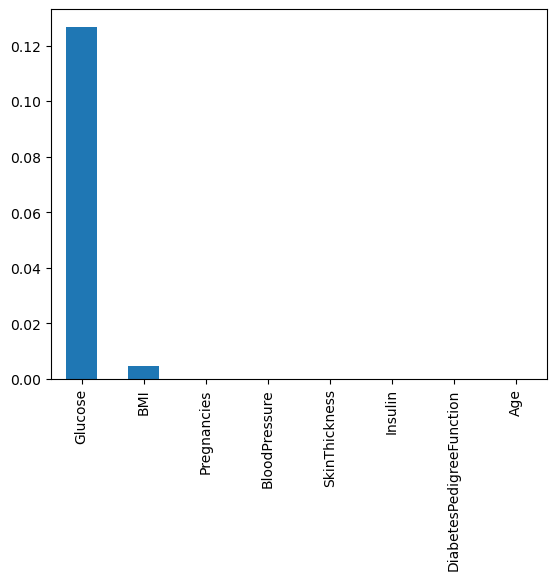

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

#### Tree Based Models

### Feature Selection using Decision Tree

In [25]:
from sklearn import datasets
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [27]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [28]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
rf.feature_importances_

array([0.08722276, 0.25290445, 0.09211326, 0.07158342, 0.07540828,
       0.16666917, 0.12476494, 0.12933372])

In [30]:
dt.feature_importances_

array([0.05776758, 0.2869385 , 0.08832838, 0.06012145, 0.02869439,
       0.21063868, 0.11047043, 0.1570406 ])

<Axes: >

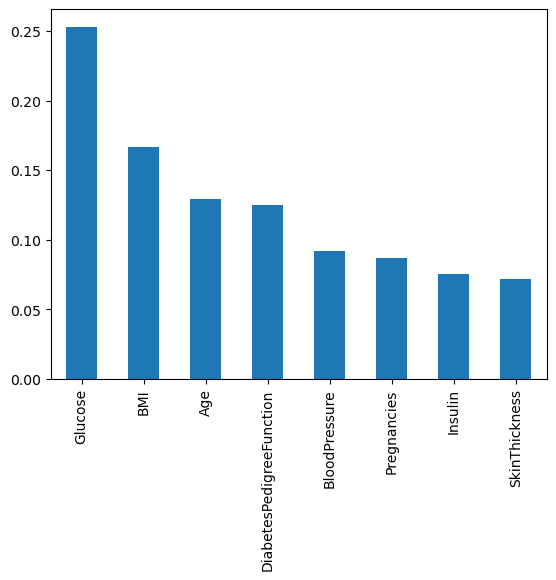

In [31]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

<Axes: >

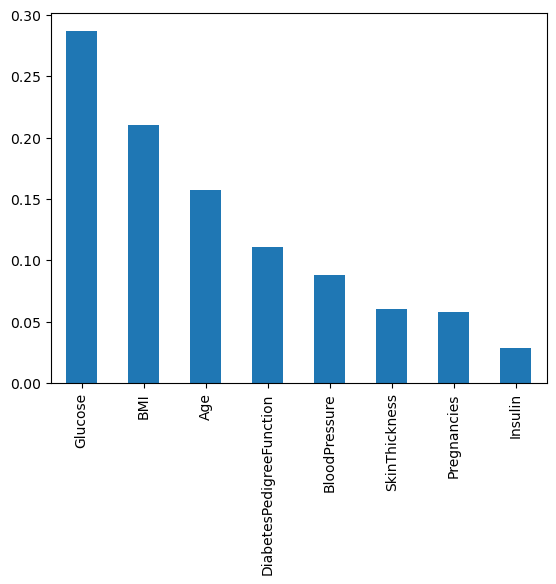

In [32]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

### SelectFromModel

In [39]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [43]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=0.15)

In [44]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.15)

In [45]:
sfm.get_support(indices=True)

array([1, 5], dtype=int64)

In [46]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI'], dtype=object)

In [47]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI
0,145.0,37.9
1,129.0,41.2
2,102.0,37.2
3,120.0,25.0
4,120.0,39.7
...,...,...
609,157.0,39.4
610,187.0,33.9
611,126.0,43.4
612,171.0,43.6


### Recursive Feature Selection

In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [51]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [53]:
rf.feature_importances_

array([0.08744999, 0.02165232, 0.40379256, 0.48710513])

In [54]:
X.drop(columns='sepal_width',inplace=True)
X.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [55]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.1928663 , 0.39754999, 0.40958371])

In [56]:
X.drop(columns='sepal_length',inplace=True)
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [57]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.49743429, 0.50256571])

In [58]:
X.drop(columns='petal_length',inplace=True)
X.head()

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


### Sklearn RFE

In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1,step=2)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 3
petal_length: 1
petal_width: 2


In [100]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Mutual Info

In [60]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [62]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob

B,b1,b2,All
A,,,
a1,2,2,4
a2,2,2,4
All,4,4,8


In [63]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.44918241468232045
Feature 1: Mutual Information = 0.2579163151760684
Feature 2: Mutual Information = 0.9756733168857097
Feature 3: Mutual Information = 0.9868454359779937


In [105]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X,y)

# Get columns  to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]


#### Advantages and Disadvantages

Advantages:
    
1. Performance: They are generally more accurate than filter methods since they take the 
interactions between features into account.
1.
Efficiency: They are more computationally efficient than wrapper methods since they fit 
the model only once.
2.
Less Prone to Overfitting: They introduce some form of regularization, which helps to 
avoid overfitting. For example, Lasso and Ridge regression add a penalty to the loss 
function, shrinking some coefficients to zero.


Disadvantages:

1. Model Specific: Since they are tied to a specific machine learning model, the selected 
features are not necessarily optimal for other models.
1.
Complexity: They can be more complex and harder to interpret than filter methods. For 
example, understanding why Lasso shrinks some coefficients to zero and not others can 
be non-trivial.
2.
Tuning Required: They often have hyperparameters that need to be tuned, like the 
regularization strength in Lasso and Ridge regression.
3.
Stability: Depending on the model and the data, small changes in the data can result in 
different sets of selected features. This is especially true for models that can fit complex 
decision boundaries, like decision trees

1. Filter Methods:

•
Variance Threshold: Removes all features whose variance doesn’t meet a 
certain threshold. Use this when you have many features and you want to 
remove those that are constants or near constants.

•
Correlation Coefficient: Finds the correlation between each pair of 
features. Highly correlated features can be removed since they contain 
similar information. Use this when you suspect that some features are 
highly correlated.

•
Chi-Square Test: This statistical test is used to determine if there’s a 
significant association between two variables. It's commonly used for 
categorical variables. Use this when you have categorical features and you 
want to find their dependency with the target variable.

•
Mutual Information: Measures the dependency between two variables. 
It's a more general form of the correlation coefficient and can capture 
non-linear dependencies. Use this when you want to measure both linear 
and non-linear dependencies between features and the target variable.

•
ANOVA (Analysis of Variance): ANOVA is a statistical test that stands for 
"Analysis of Variance". ANOVA tests the impact of one or more factors by 
comparing the means of different samples. Use this when you have one or 
more categorical independent variables and a continuous dependent 
variable.

2. Wrapper Methods:

•
Recursive Feature Elimination (RFE): Recursively removes features, builds 
a model using the remaining attributes, and calculates model accuracy. It 
uses model accuracy to identify which attributes contribute the most. Use 
this when you want to leverage the model to identify the best features.

•
Sequential Feature Selection (SFS): Adds or removes one feature at the 
time based on the classifier performance until a feature subset of the 
desired size k is reached. Use this when computational cost is not an issue 
and you want to find the optimal feature subset.

•
Exhaustive Feature Selection: This is a brute-force evaluation of each 
feature subset. This method, as the name suggests, tries out all possible 
combinations of variables and returns the best subset. Use this when the number of features is small, as it can be computationally expensive.

3. Embedded Methods:

 
• Lasso Regression: Lasso (Least Absolute Shrinkage and Selection Operator) 
is a regression analysis method that performs both variable selection and 
regularization. Use this when you want to create a simple and 
interpretable model.

•
Ridge Regression: Ridge regression is a method used to analyze multiple 
regression data that suffer from multicollinearity. Unlike Lasso, it doesn't 
lead to feature selection but rather minimizes the complexity of the 
model.

•
Elastic Net: This method is a combination of Lasso and Ridge. It 
incorporates penalties from both methods and is particularly useful when 
there are multiple correlated features.

•
Random Forest Importance: Random forests provide a straightforward 
method for feature selection, namely mean decrease impurity (MDI). Use 
this when you want to leverage the power of random forests for feature 
selection.